# Setup

In [73]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts 

In [74]:
df = pd.read_csv('data.csv')

df = df.drop(['id', 'Unnamed: 32'], axis=1)
diagnosis = df['diagnosis']
df_features = df.drop(['diagnosis'], axis=1)

In [3]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Our class variable 'diagnosis' has two levels 'M' - malignant, i.e cancer - and 'B' - benign, i.e no cancer. We have rougly twice as much cases with no cancer detected. 

In [4]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Note that the data contains means, standard errors and worst values of 10 features:

- radius
- texture 
- perimeter
- area
- smoothness 
- compactness
- concavity
- concave points
- symmetry
- fractal dimension

In [5]:
df.shape

(569, 31)

In [6]:
df.isnull().sum().sum()

0

No missing values.

# Analysis

In [7]:
means = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

worst = ['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

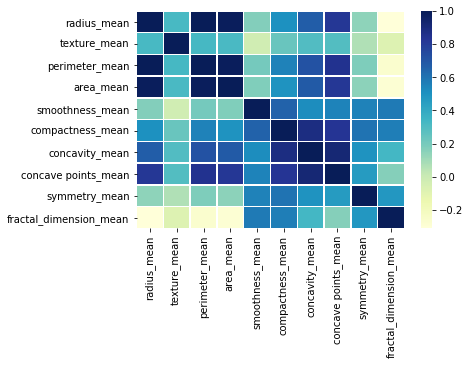

In [8]:
corr = df[means].corr()
corr = corr[(abs(corr)>0)]
sns.heatmap(corr, linewidths=.5,cmap="YlGnBu")

plt.savefig('correlations_means.jpg')

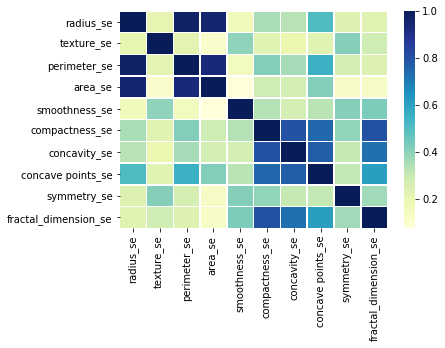

In [9]:
corr = df[se].corr()
corr = corr[(abs(corr)>0)]
sns.heatmap(corr, linewidths=.5,cmap="YlGnBu")

plt.savefig('correlations_se.jpg')

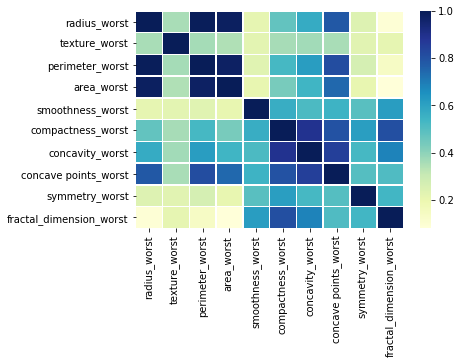

In [10]:
corr = df[worst].corr()
corr = corr[(abs(corr)>0)]
sns.heatmap(corr, linewidths=.5,cmap="YlGnBu")

plt.savefig('correlations_worst.jpg')

In [82]:
df_normalized = (df_features - df_features.mean())/(df_features.std())
df = pd.concat([diagnosis, df_normalized], axis=1) #now we have normalized dataset
df.columns #normalized df
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [12]:
df_mean = pd.concat([df[means], diagnosis], axis=1)
df_worst = pd.concat([df[worst], diagnosis], axis=1)
df_se = pd.concat([df[se], diagnosis], axis=1)

<Figure size 3600x3600 with 0 Axes>

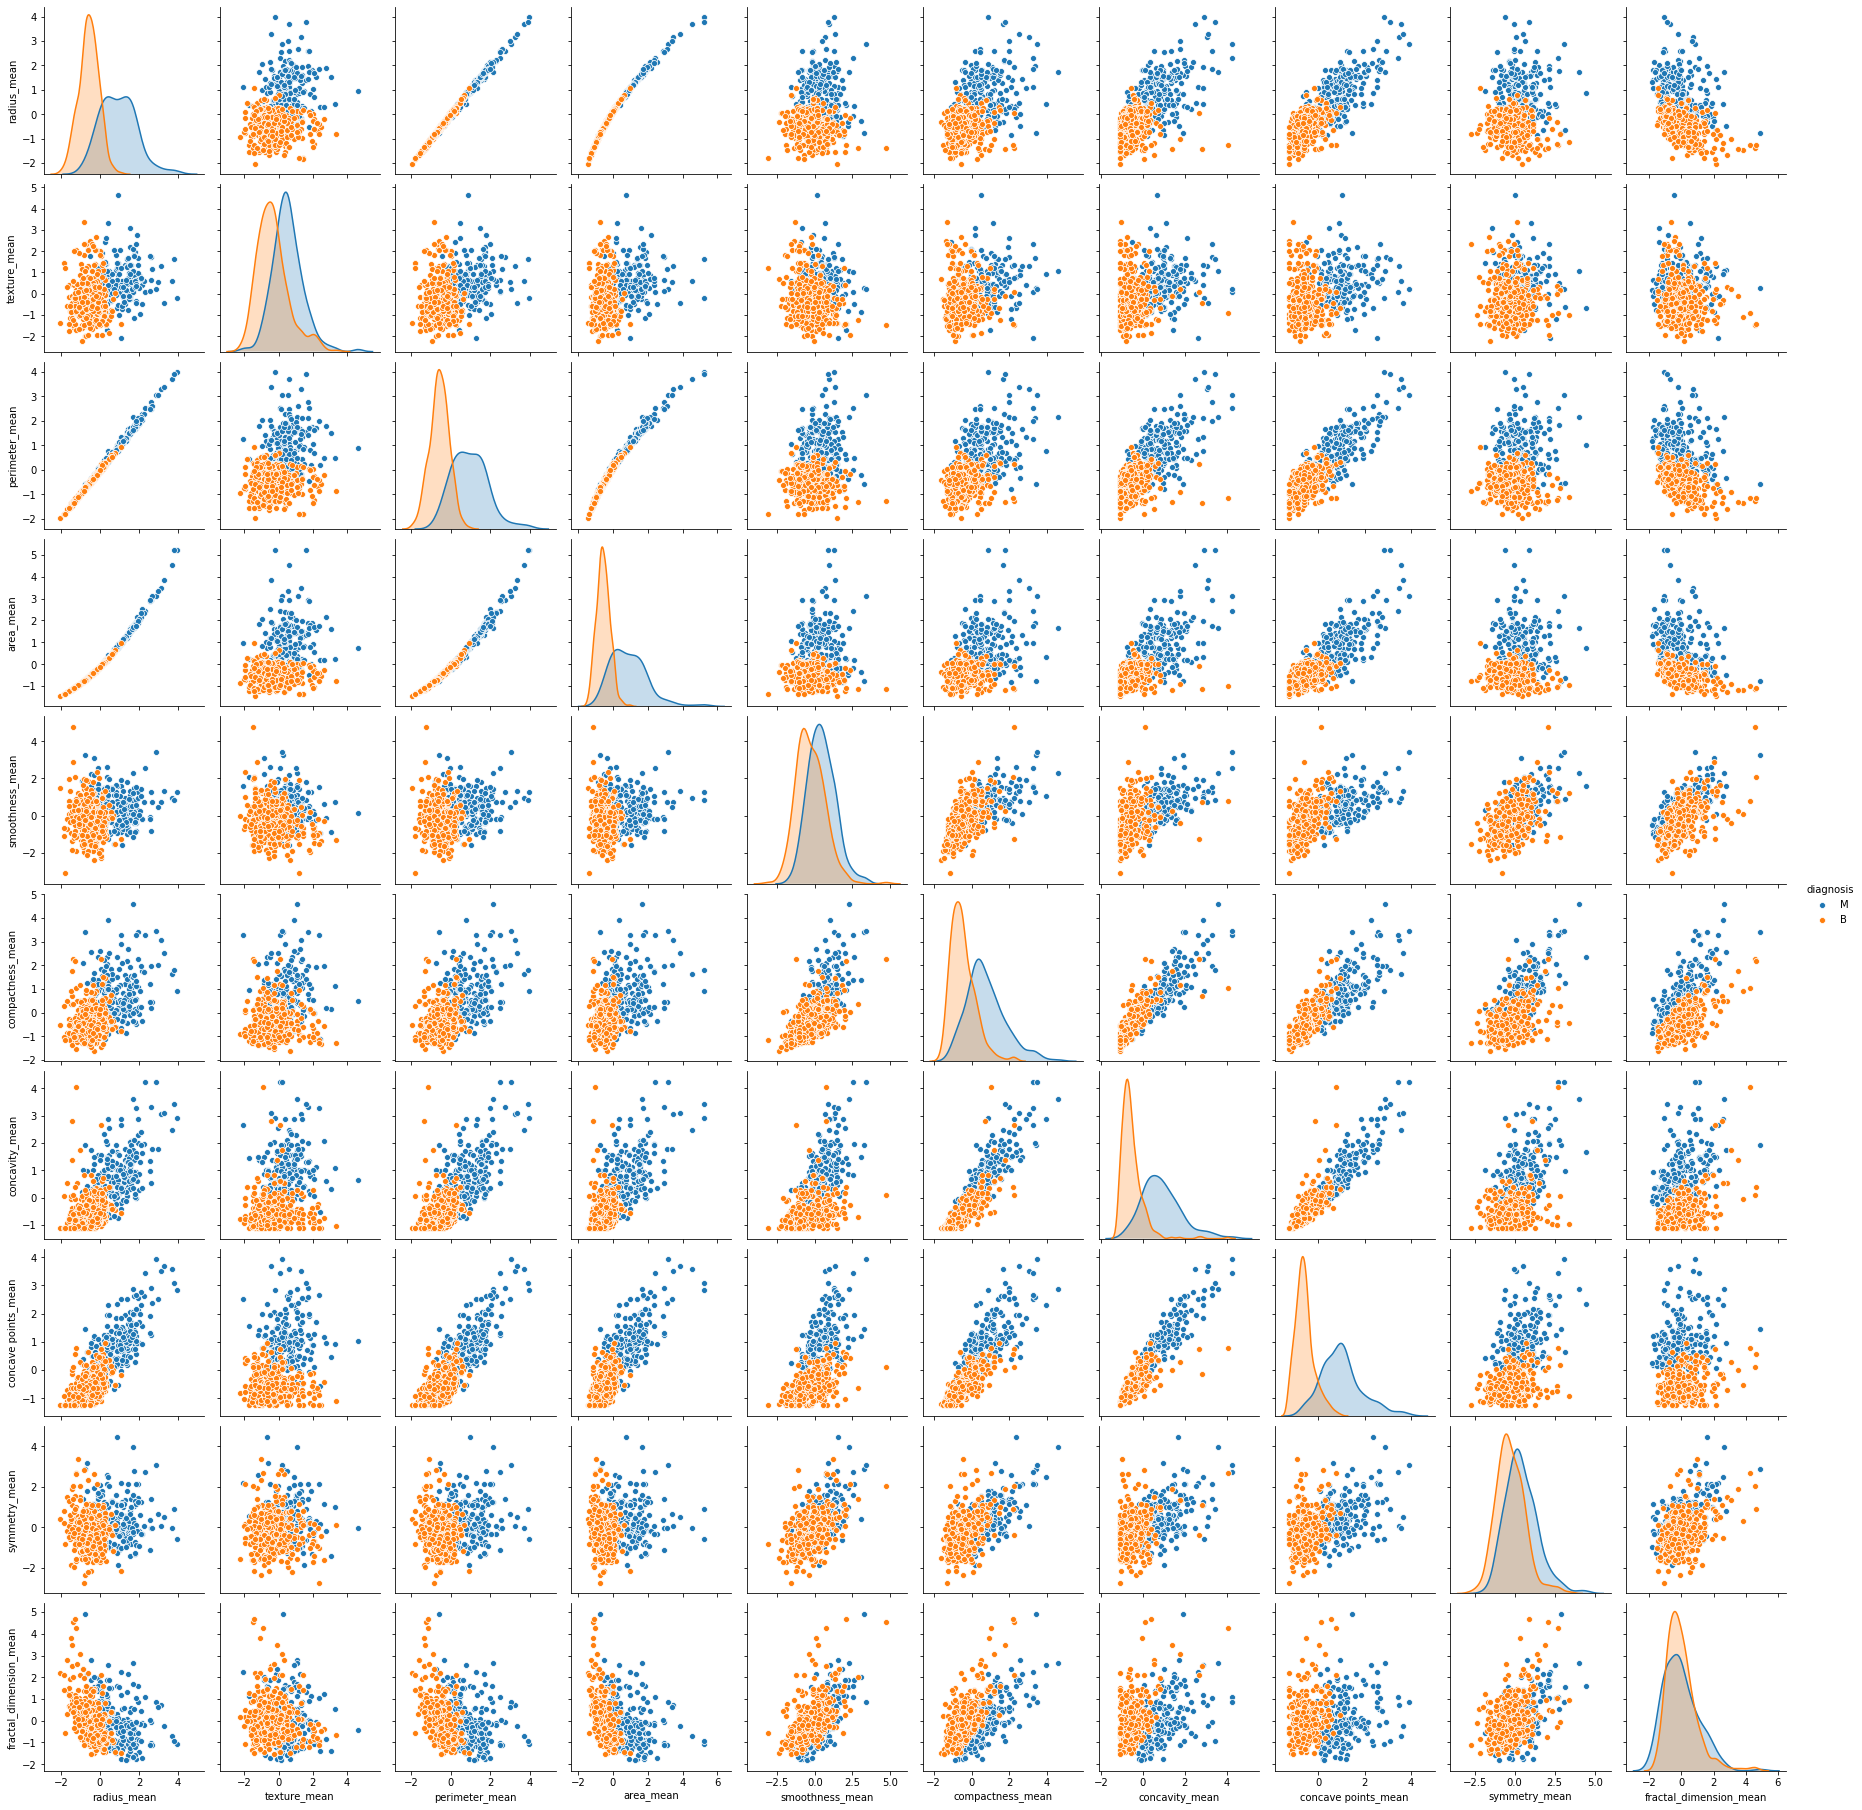

In [13]:
plt.figure(figsize=(50,50))
sns.pairplot(df_mean, hue='diagnosis')
plt.savefig('mean_pairplot.jpg')

<Figure size 3600x3600 with 0 Axes>

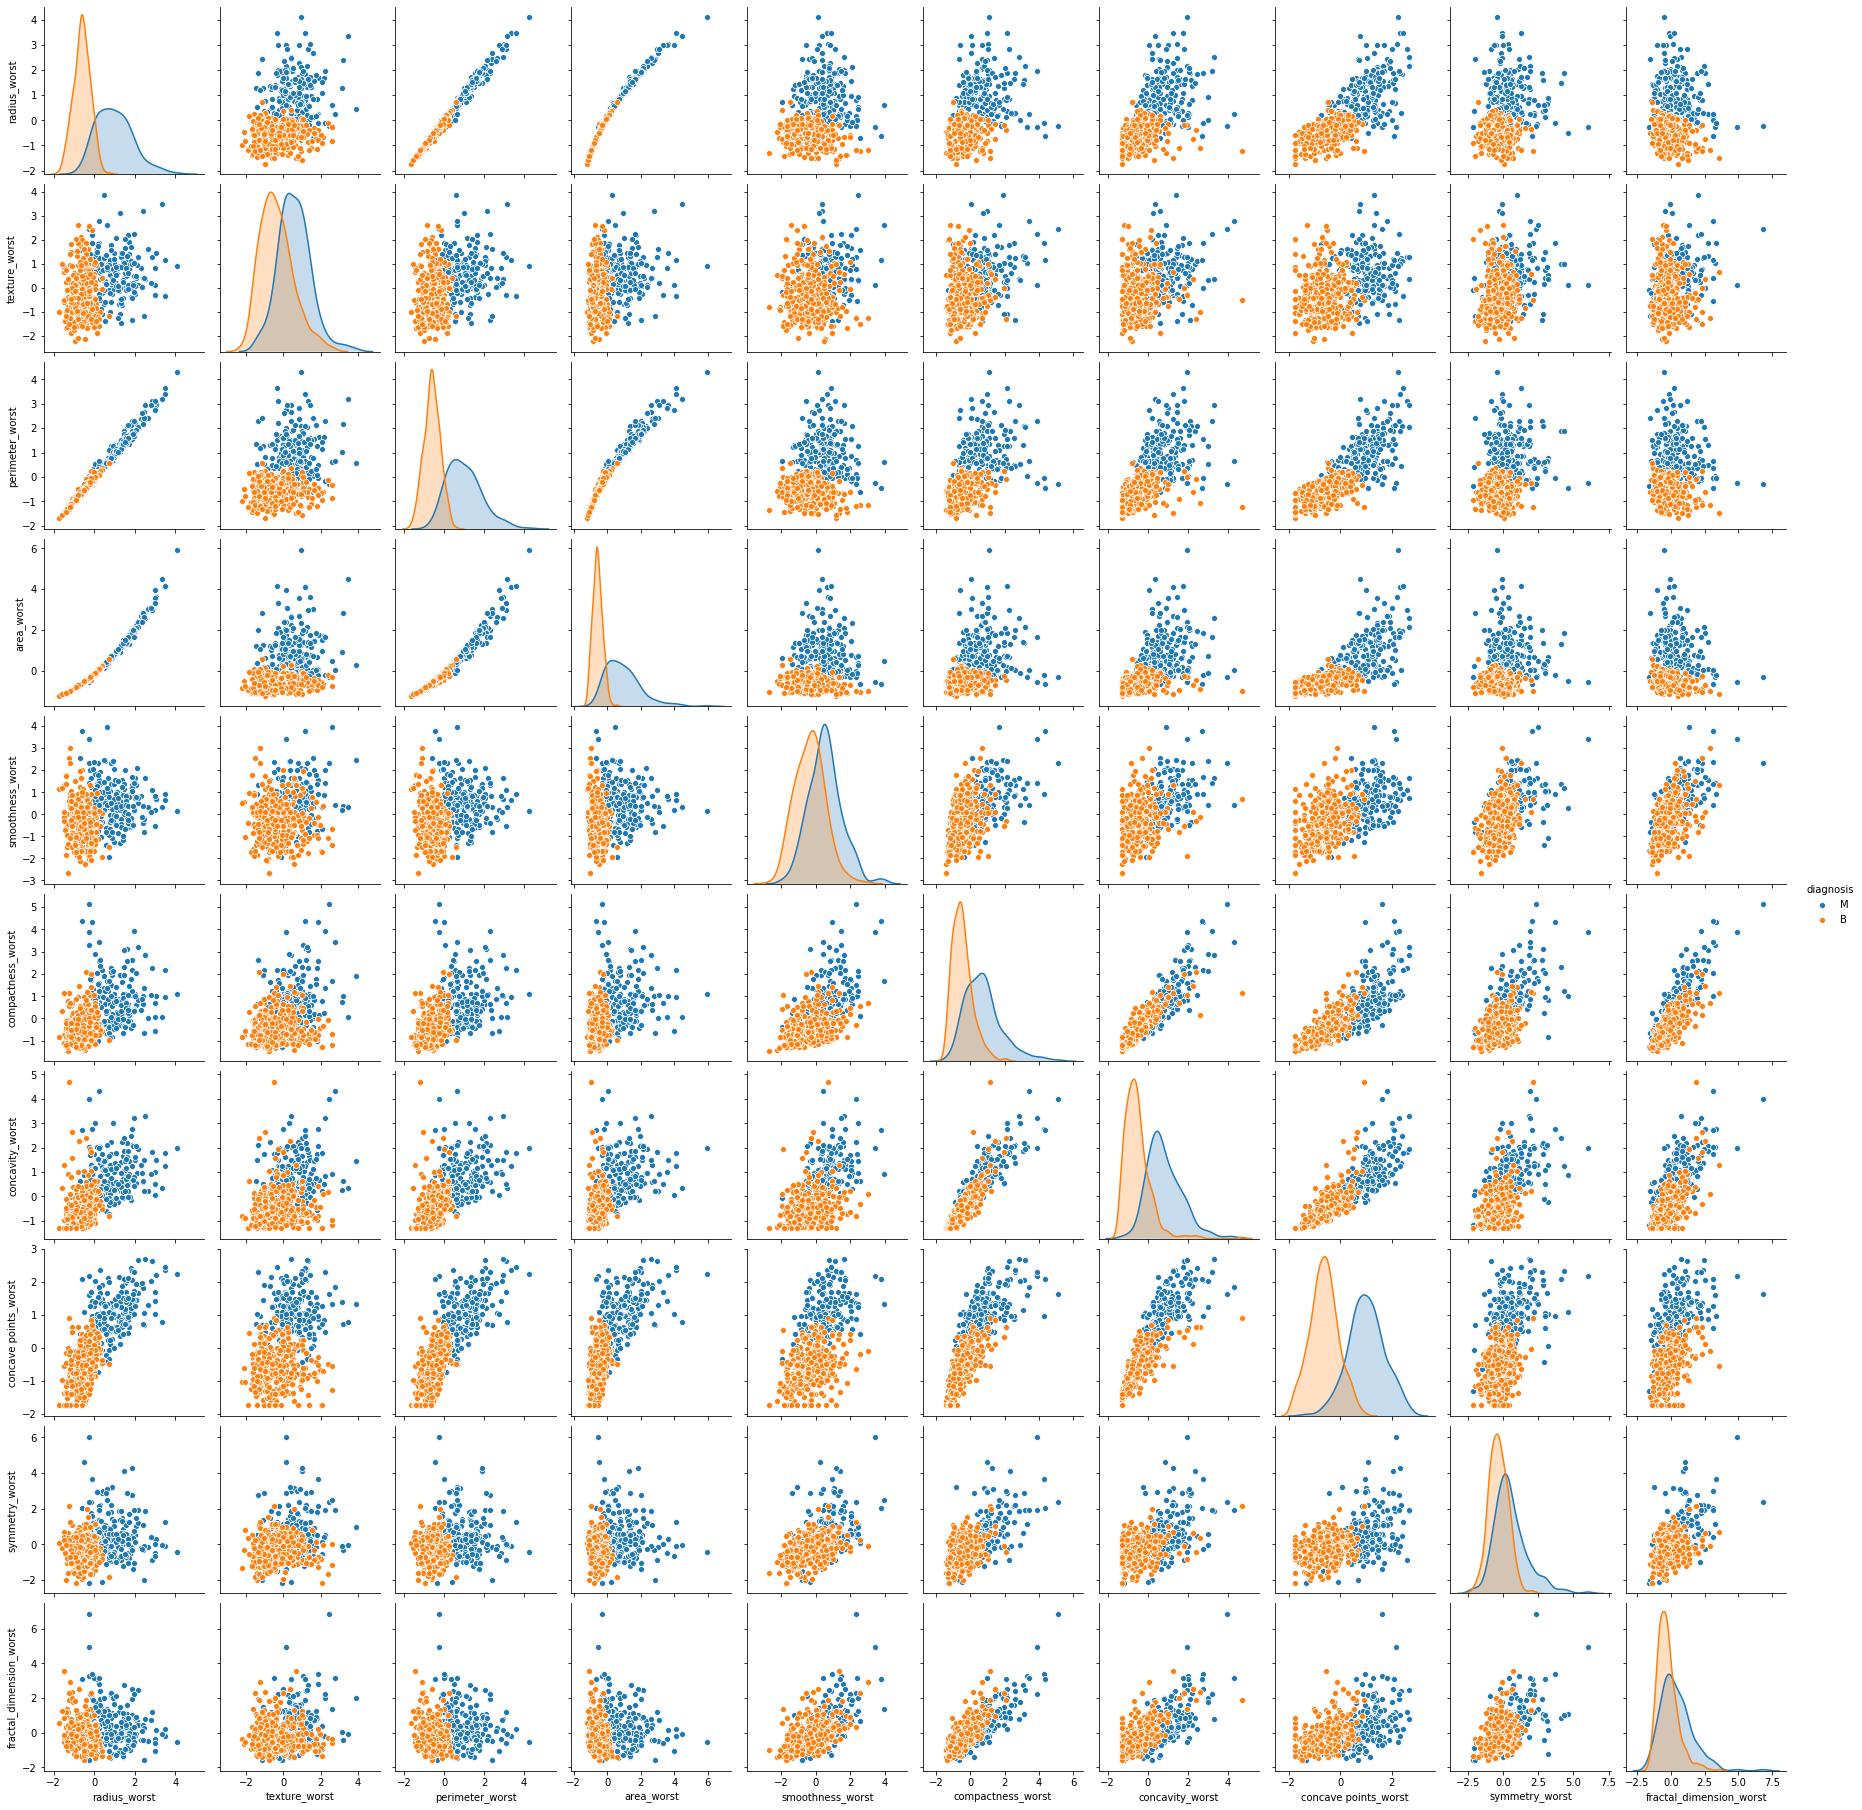

In [14]:
plt.figure(figsize=(50,50))
sns.pairplot(df_worst, hue='diagnosis')
plt.savefig('worst_pairplot.jpg')

<Figure size 3600x3600 with 0 Axes>

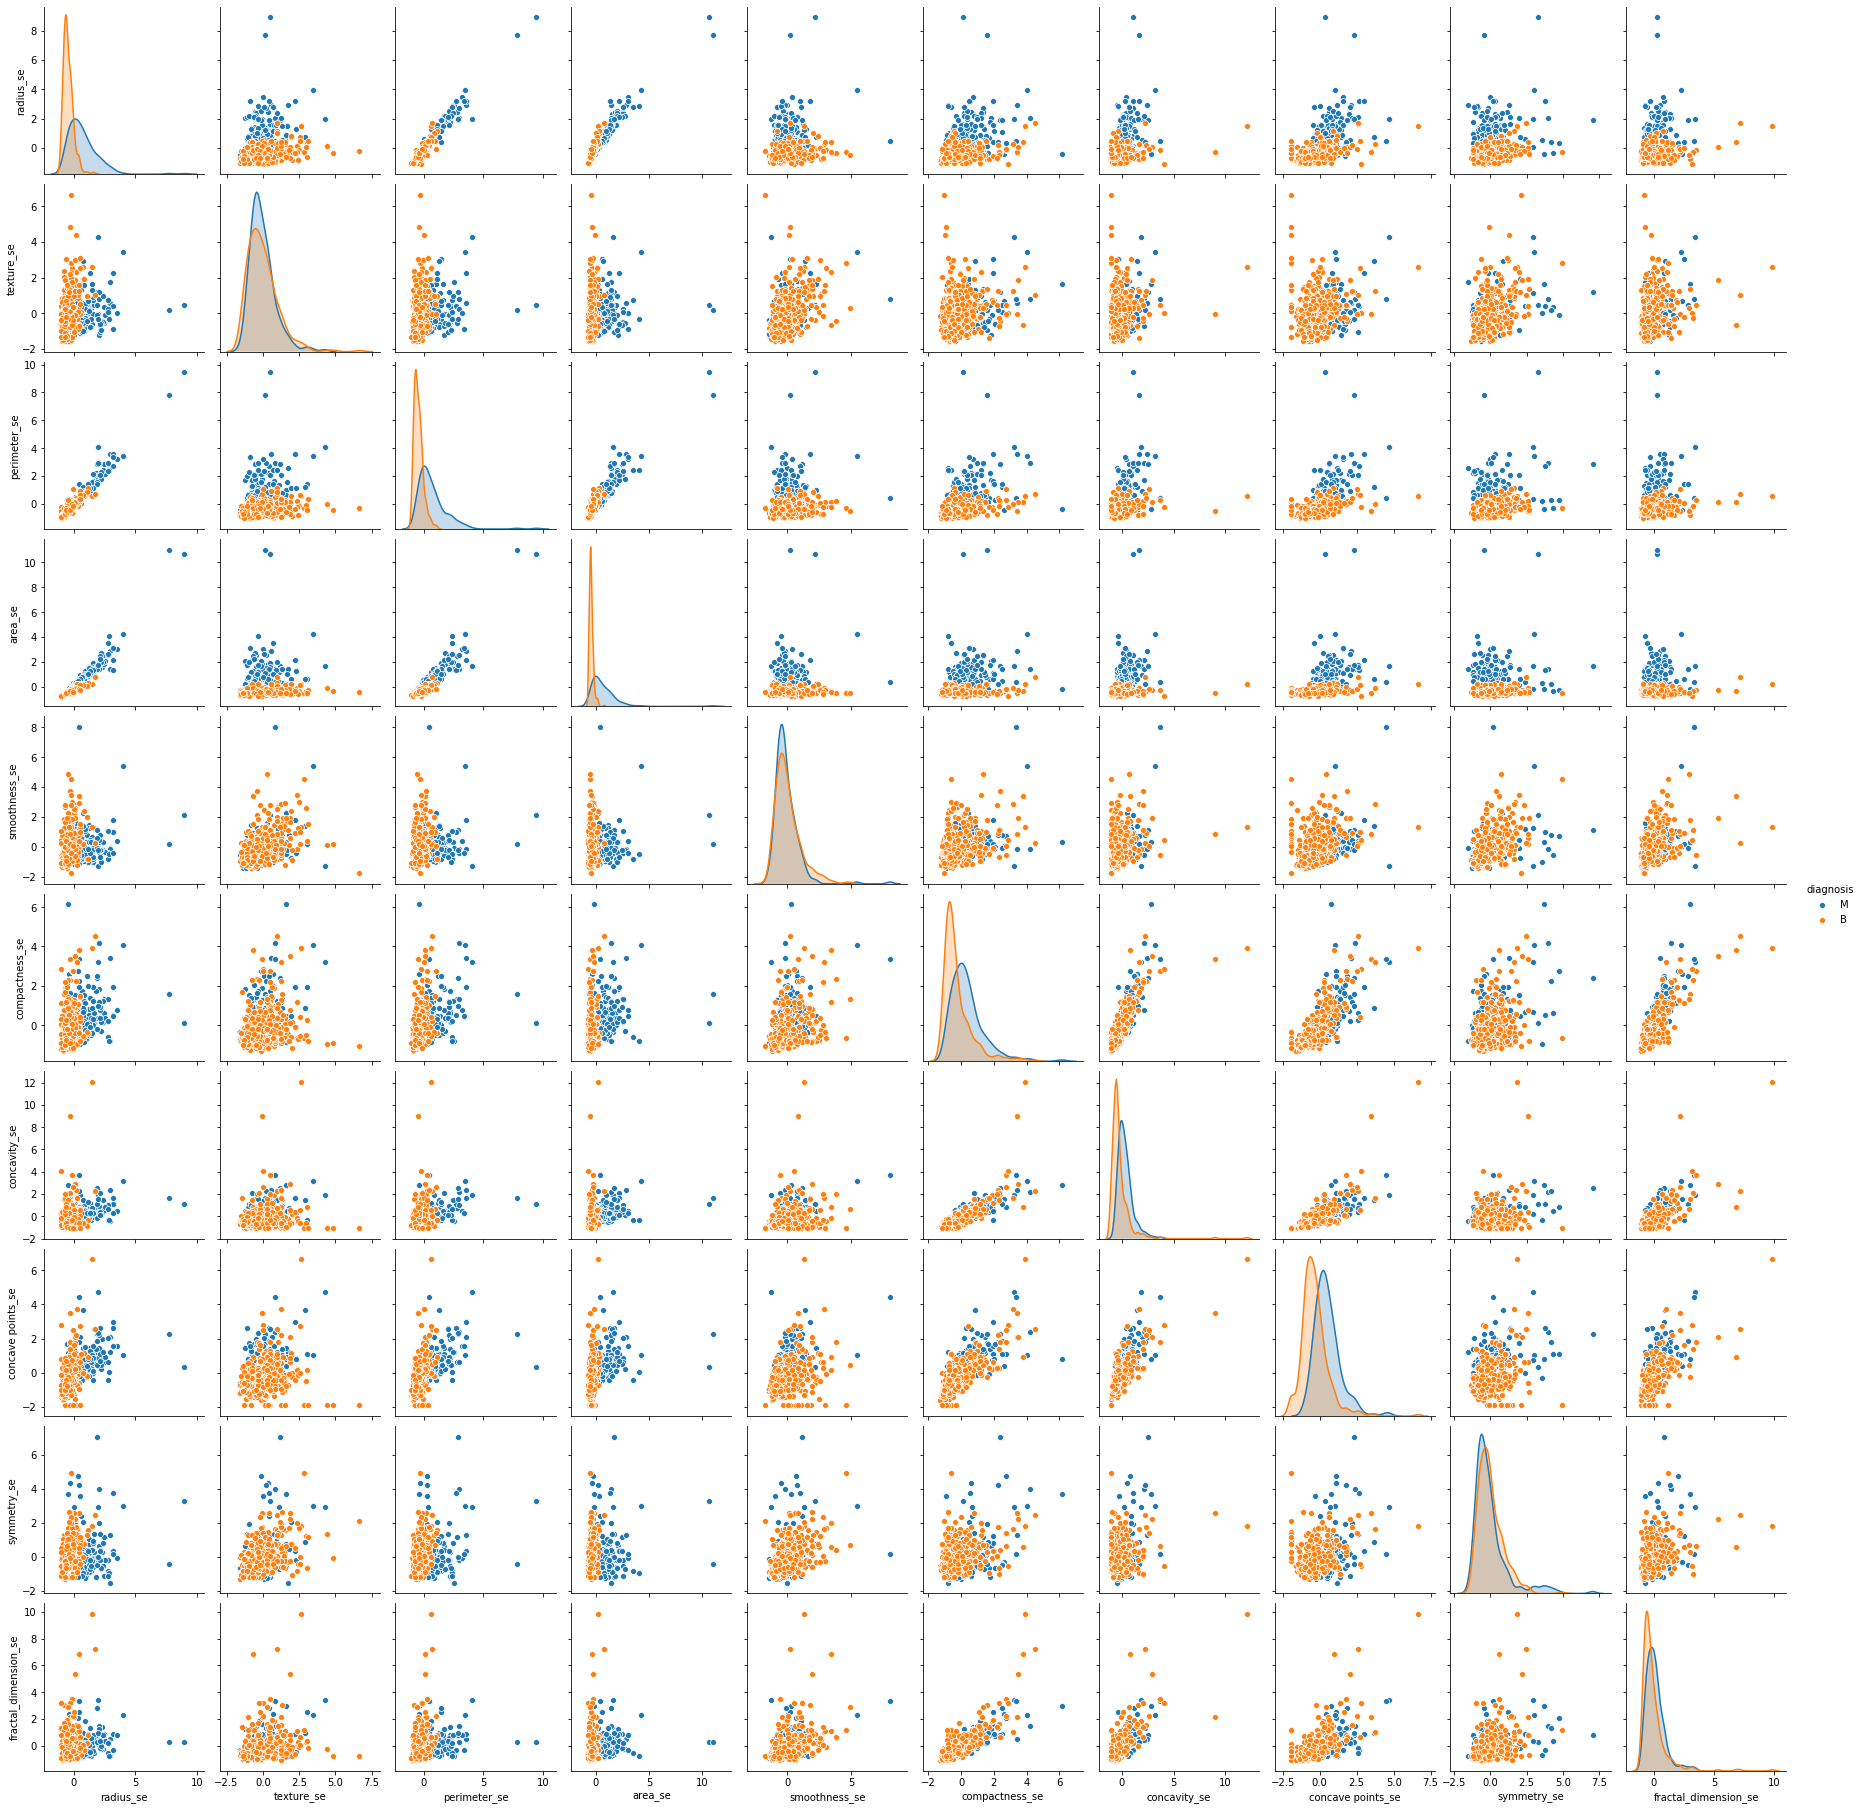

In [15]:
plt.figure(figsize=(50,50))
sns.pairplot(df_se, hue='diagnosis')
plt.savefig('se_pairplot.jpg')

We generally see that the most interesting variables are connected to concavity, radius and area of the cell (distributions fo different diagnosis are different). Also as it was previously said, 'worst' are most different. 

In [16]:
#df_mean_1 = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
#       'smoothness_mean','diagnosis']]

#df_mean_2 = df[['compactness_mean', 'concavity_mean',
#       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
#       'diagnosis']]

df_mean = df[['concavity_mean', 'radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'diagnosis']]

In [17]:
#df_worst_1 = df[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
#       'smoothness_worst','diagnosis']]
#df_worst_2 = df[['compactness_worst', 'concavity_worst',
#       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
#       'diagnosis']]

df_worst = df[['concavity_worst', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst', 'diagnosis']]

In [18]:
#df_se_1 = df[['radius_se', 'texture_se', 'perimeter_se', 'area_se',
#       'smoothness_se','diagnosis']]
#df_se_2 = df[['compactness_se', 'concavity_se',
#       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
#       'diagnosis']]

df_se = df[['concavity_se', 'radius_se', 'perimeter_se', 'area_se', 'concave points_se', 'diagnosis']]

In [19]:
data_m = pd.melt(df_mean,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

data_w = pd.melt(df_worst,id_vars="diagnosis",
                    var_name="features",
                 
                    value_name='value')

data_s = pd.melt(df_se,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

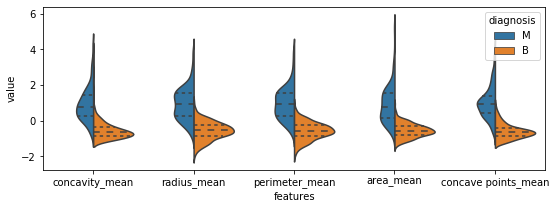

In [20]:
plt.figure(figsize=(9,3))

sns.violinplot(x="features", y="value", hue="diagnosis", data=data_m,split=True, inner="quart")
plt.savefig('violin_m.jpg')

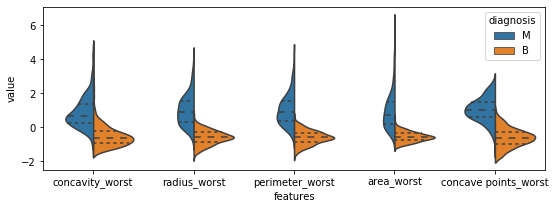

In [21]:
plt.figure(figsize=(9,3))

sns.violinplot(x="features", y="value", hue="diagnosis", data=data_w,split=True, inner="quart")
plt.savefig('violin_w.jpg')

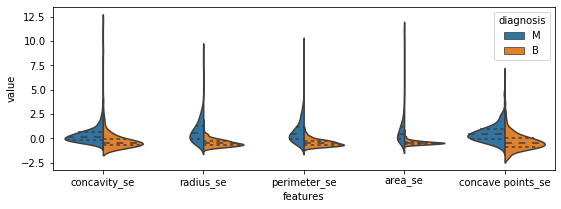

In [22]:
plt.figure(figsize=(9,3))

sns.violinplot(x="features", y="value", hue="diagnosis", data=data_s,split=True, inner="quart")
plt.savefig('violin_s.jpg')

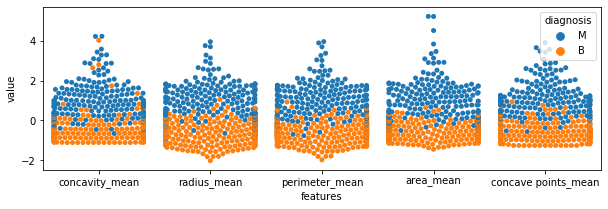

In [23]:
plt.figure(figsize=(10,3))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_m)
plt.savefig('swarm_m.jpg')

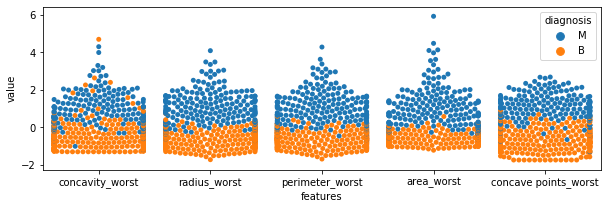

In [24]:
plt.figure(figsize=(10,3))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_w)
plt.savefig('swarm_w.jpg')

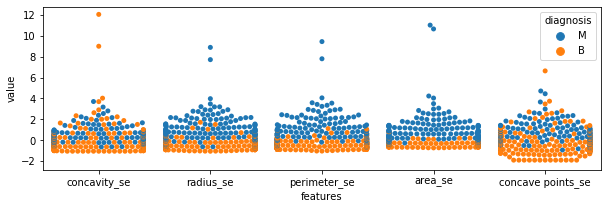

In [25]:
plt.figure(figsize=(10,3))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_s)
plt.savefig('swarm_s.jpg')

Looks like cases with cancer have bigger values of each feature except from symmetry and fractal_dimension

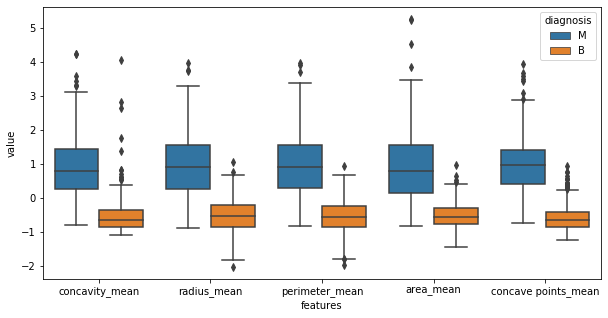

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_m)
plt.savefig('box_m.jpg')

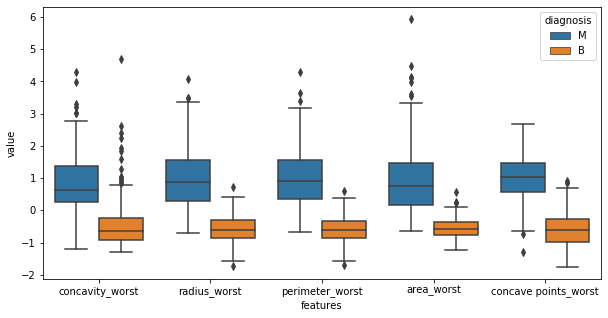

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_w)
plt.savefig('box_w.jpg')

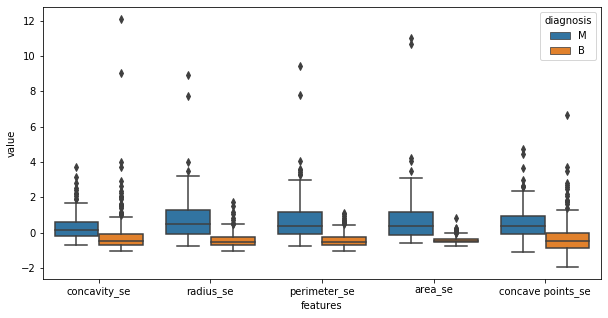

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_s)
plt.savefig('box_s.jpg')

In [29]:
a=df[(diagnosis=='M')].shape[0]
b=df[(diagnosis=='B')].shape[0]

print(round(a*100/(a+b)),'% of observations are of cancer, and', round(b*100/(a+b)),'% are others. We have:', a+b, 'observations.')

37 % of observations are of cancer, and 63 % are others. We have: 569 observations.


Generally, from plots we can note that malignant cells are more spread then benign for some features (see below), but they generally do not have a clear clustering behavious. 

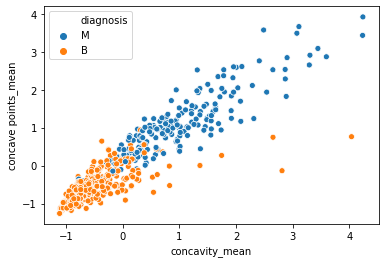

In [30]:
sns.scatterplot(x='concavity_mean', y='concave points_mean', hue='diagnosis', data=df_mean)

plt.savefig('concavity_concave points.jpg')

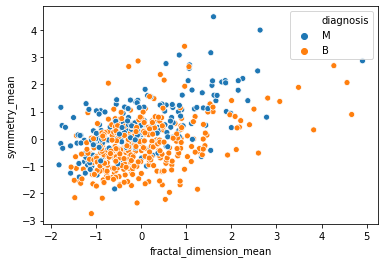

In [31]:
sns.scatterplot(x='fractal_dimension_mean', y='symmetry_mean', hue='diagnosis', data=df)
plt.savefig('fractal_symmetry.jpg')

In [32]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# t-SNE

In [130]:
from sklearn.manifold import TSNE
data = np.array(df[worst])
data_selected = np.array(df)

In [131]:
fitted = pd.DataFrame(TSNE(n_components=2).fit_transform(data))
fitted['diagnosis'] = diagnosis

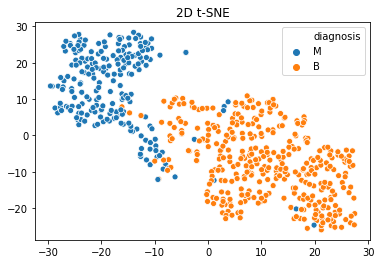

In [137]:
fig = sns.scatterplot(x = 0, y= 1, hue='diagnosis', data=fitted)
fig.set_title("2D t-SNE")
fig.set(xlabel="",ylabel="")
plt.savefig('t-sne.jpg')